In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [2]:
Customers=pd.read_csv("Customer.csv")

In [3]:
Prod_cat_info=pd.read_csv("prod_cat_info.csv")

In [4]:
Transactions=pd.read_csv("Transactions.csv")

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
C_1=pd.merge(left=Customers,
         right=Transactions,
         left_on = 'customer_Id',
         right_on = 'cust_id',
         how = "outer", 
        )
C_1.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,1.619787e+10,268408.0,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,2.881014e+10,268408.0,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,6.463344e+10,268408.0,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store


In [6]:
Customer_final=pd.merge(left=C_1,
                        right=Prod_cat_info,
                        left_on=['prod_subcat_code','prod_cat_code'],
                        right_on=['prod_sub_cat_code','prod_cat_code'],
                        how="outer",
                             )
Customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction
1,275152,16-01-1970,M,4.0,7.310943e+10,275152.0,25-03-2011,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7.0,Fiction
2,275034,18-01-1970,F,4.0,6.477727e+10,275034.0,23-05-2011,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7.0,Fiction
3,270829,22-01-1970,F,8.0,8.717434e+10,270829.0,9/12/2013,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7.0,Fiction
4,267657,29-01-1970,F,7.0,7.624274e+10,267657.0,23-05-2013,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7.0,Fiction


### 2. Prepare a summary report for the merged data set.
#### a. Get the column names and their corresponding data types


In [7]:
Customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id       float64
cust_id              float64
tran_date             object
prod_subcat_code     float64
prod_cat_code        float64
Qty                  float64
Rate                 float64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code    float64
prod_subcat           object
dtype: object

#### b. Top/Bottom 10 observations

In [8]:
Customer_final.head(10)
Customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23184,268914,15-11-1992,F,3.0,1.407824e+09,268914.0,10/6/2011,10.0,5.0,1.0,1252.0,131.460,1383.460,MBR,Books,10.0,Non-Fiction
23185,269519,17-11-1992,M,9.0,2.971950e+10,269519.0,24-12-2013,10.0,5.0,4.0,1036.0,435.120,4579.120,TeleShop,Books,10.0,Non-Fiction
23186,273524,25-11-1992,F,1.0,2.576281e+10,273524.0,19-11-2012,10.0,5.0,1.0,1401.0,147.105,1548.105,Flagship store,Books,10.0,Non-Fiction
23187,272141,02-12-1992,F,10.0,7.133709e+10,272141.0,22-07-2012,10.0,5.0,-3.0,-1422.0,447.930,-4713.930,e-Shop,Books,10.0,Non-Fiction
23188,272141,02-12-1992,F,10.0,7.133709e+10,272141.0,16-07-2012,10.0,5.0,3.0,1422.0,447.930,4713.930,e-Shop,Books,10.0,Non-Fiction
23189,267812,04-12-1992,F,1.0,6.354038e+10,267812.0,10/10/2012,10.0,5.0,3.0,224.0,70.560,742.560,TeleShop,Books,10.0,Non-Fiction
23190,274618,09-12-1992,F,7.0,7.179320e+10,274618.0,17-08-2013,10.0,5.0,4.0,691.0,290.220,3054.220,Flagship store,Books,10.0,Non-Fiction
23191,268097,15-12-1992,F,7.0,9.121711e+10,268097.0,1/2/2012,10.0,5.0,2.0,411.0,86.310,908.310,e-Shop,Books,10.0,Non-Fiction
23192,268097,15-12-1992,F,7.0,9.011448e+10,268097.0,31-01-2011,10.0,5.0,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,10.0,Non-Fiction
23193,268097,15-12-1992,F,7.0,9.011448e+10,268097.0,26-01-2011,10.0,5.0,4.0,1408.0,591.360,6223.360,e-Shop,Books,10.0,Non-Fiction


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [9]:
Customer_final_cont=Customer_final[["Qty","Rate","Tax","total_amt"]]
Customer_final_cont.describe().reset_index()

,index,Qty,Rate,Tax,total_amt
0,count,23053.000000,23053.000000,23053.000000,23053.000000
1,mean,2.432395,636.369713,248.667192,2107.308002
2,std,2.268406,622.363498,187.177773,2507.561264
3,min,-5.000000,-1499.000000,7.350000,-8270.925000
4,25%,1.000000,312.000000,98.280000,762.450000
5,50%,3.000000,710.000000,199.080000,1754.740000
6,75%,4.000000,1109.000000,365.715000,3569.150000
7,max,5.000000,1500.000000,787.500000,8287.500000


#### d. Frequency tables for all the categorical variables

In [10]:
Customer_final.dtypes.loc[(Customer_final.dtypes==object)]

DOB            object
Gender         object
tran_date      object
Store_type     object
prod_cat       object
prod_subcat    object
dtype: object

In [11]:
Customer_final_categ=Customer_final[['Gender','Store_type','prod_cat','prod_subcat']]
Customer_final_categ.count() 

Gender         23185
Store_type     23053
prod_cat       23053
prod_subcat    23053
dtype: int64

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [12]:
Customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id       float64
cust_id              float64
tran_date             object
prod_subcat_code     float64
prod_cat_code        float64
Qty                  float64
Rate                 float64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code    float64
prod_subcat           object
dtype: object

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 457.,  458.,  405.,  438.,  419.,    0., 4214., 4123., 4174.,
        8365.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Patch objects>)

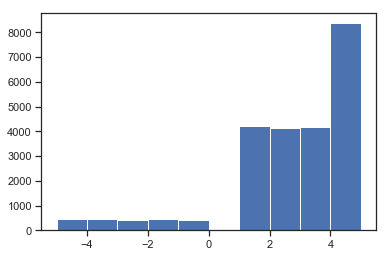

In [13]:
plt.hist(Customer_final.Qty)

(array([ 496.,  446.,  464.,  411.,  360., 3413., 4335., 4336., 4349.,
        4443.]),
 array([-1.4990e+03, -1.1991e+03, -8.9920e+02, -5.9930e+02, -2.9940e+02,
         5.0000e-01,  3.0040e+02,  6.0030e+02,  9.0020e+02,  1.2001e+03,
         1.5000e+03]),
 <a list of 10 Patch objects>)

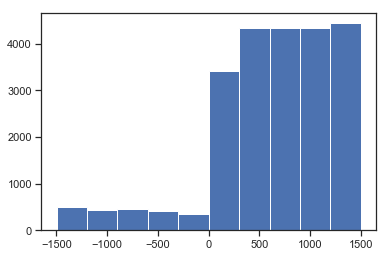

In [14]:
plt.hist(Customer_final.Rate)

(array([4868., 5303., 3023., 2944., 1912., 1823., 1078., 1058.,  523.,
         521.]),
 array([  7.35 ,  85.365, 163.38 , 241.395, 319.41 , 397.425, 475.44 ,
        553.455, 631.47 , 709.485, 787.5  ]),
 <a list of 10 Patch objects>)

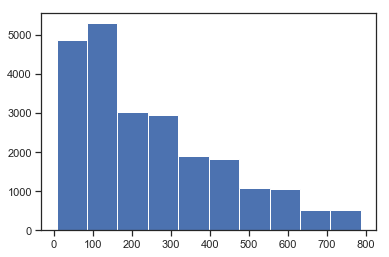

In [15]:
plt.hist(Customer_final.Tax)

(array([ 109.,  231.,  360.,  564.,  913., 9062., 5505., 3435., 1930.,
         944.]),
 array([-8270.925 , -6615.0825, -4959.24  , -3303.3975, -1647.555 ,
            8.2875,  1664.13  ,  3319.9725,  4975.815 ,  6631.6575,
         8287.5   ]),
 <a list of 10 Patch objects>)

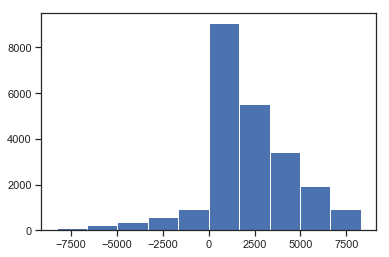

In [16]:
plt.hist(Customer_final.total_amt)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


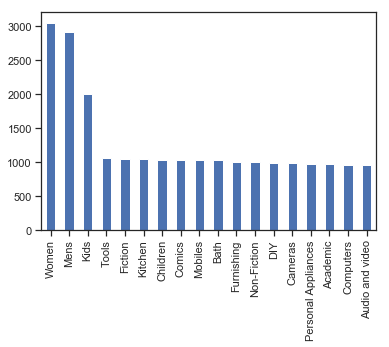

In [17]:
Customer_final['prod_subcat'].value_counts().plot('bar')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


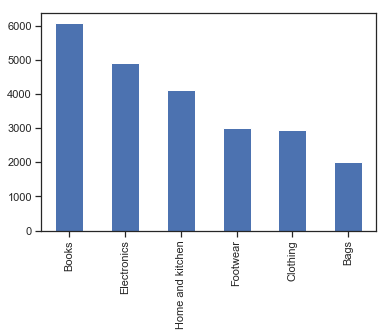

In [18]:
Customer_final['prod_cat'].value_counts().plot('bar')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


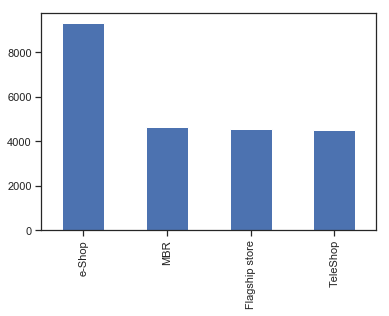

In [19]:
Customer_final['Store_type'].value_counts().plot('bar')

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


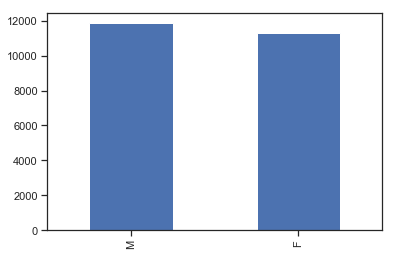

In [20]:
Customer_final['Gender'].value_counts().plot('bar')

### 4. Calculate the following information using the merged dataset :
#### a. Time period of the available transaction data

In [21]:
Customer_final.tran_date=pd.to_datetime(Customer_final.tran_date)

In [22]:
T_max=Customer_final.tran_date.max()
T_max

Timestamp('2014-12-02 00:00:00')

In [23]:
T_min=Customer_final.tran_date.min()
T_min

Timestamp('2011-01-02 00:00:00')

In [24]:
from datetime import date
Time_period=T_max-T_min
print(Time_period.days/365)

3.9178082191780823


#### b. Count of transactions where the total amount of transaction was negative

In [25]:
Customer_final[Customer_final['total_amt']<0]['transaction_id'].value_counts()

3.226394e+10    3
4.267872e+08    3
4.170893e+09    3
8.130483e+10    2
6.350005e+10    2
               ..
9.959897e+10    1
7.390921e+10    1
1.252701e+10    1
8.678442e+10    1
9.682791e+10    1
Name: transaction_id, Length: 2059, dtype: int64

### 5. Analyze which product categories are more popular among females vs male customers.

In [26]:
Pop_prod_cat = Customer_final.groupby(by = ["Gender","prod_cat"])[["prod_cat"]].count()
display(Pop_prod_cat)

prod_cat
Gender prod_cat                  
F      Bags                   994
       Books                 2949
       Clothing              1439
       Electronics           2328
       Footwear              1529
       Home and kitchen      1994
M      Bags                  1004
       Books                 3116
       Clothing              1518
       Electronics           2570
       Footwear              1469
       Home and kitchen      2134

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [27]:
Max_cust = Customer_final.groupby(by = ["city_code"])[["customer_Id"]].count().sort_values("customer_Id",ascending=False).groupby(level=0).head()
Max_cust.head(1)

,customer_Id
city_code,
4.0,2435


In [28]:
Sum_max=Max_cust.customer_Id.sum()
Sum_max

23186

In [29]:
Perc_max_cust=(Max_cust/Sum_max)*100
Perc_max_cust.head(1)

,customer_Id
city_code,
4.0,10.502027


#### Result:City_code=4.0 has maximum customers with percentage of 10.502

### 7. Which store type sells the maximum products by value and by quantity?

In [30]:
Max_prod = Customer_final.groupby(by = ["Store_type"])["Qty","total_amt"].sum().sort_values(["Qty","total_amt"],ascending=[False,False]).groupby(level=0).head(1)
Max_prod.head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763.0,19824816.05


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [31]:
G1=Customer_final.loc[(Customer_final.prod_cat=="Electronics")|(Customer_final.prod_cat=="Clothing")]
G1=G1.loc[(G1.Store_type=="Flagship store")]
G1.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
4095,274630,01-02-1970,M,4.0,7.853109e+10,274630.0,2011-07-14,9.0,3.0,5.0,653.0,342.825,3607.825,Flagship store,Electronics,9.0,Cameras
4100,270986,27-03-1970,M,10.0,1.435274e+10,270986.0,2012-01-06,9.0,3.0,4.0,525.0,220.500,2320.500,Flagship store,Electronics,9.0,Cameras
4101,270780,18-04-1970,F,3.0,5.397892e+10,270780.0,2012-06-06,9.0,3.0,3.0,730.0,229.950,2419.950,Flagship store,Electronics,9.0,Cameras
4106,271031,09-06-1970,F,2.0,6.829161e+10,271031.0,2012-02-17,9.0,3.0,1.0,926.0,97.230,1023.230,Flagship store,Electronics,9.0,Cameras
4107,273162,19-06-1970,M,8.0,6.886797e+10,273162.0,2011-11-13,9.0,3.0,1.0,1411.0,148.155,1559.155,Flagship store,Electronics,9.0,Cameras


In [32]:
G1.groupby(by=["Store_type","prod_cat"])[["total_amt"]].sum()

total_amt
Store_type     prod_cat               
Flagship store Clothing     1194423.23
               Electronics  2215136.04

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [33]:
Q_9=Customer_final.loc[(Customer_final.Gender=="M")&(Customer_final.prod_cat=="Electronics")]
Q_9

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
4092,268408,02-01-1970,M,4.0,5.690286e+10,268408.0,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,9.0,Cameras
4095,274630,01-02-1970,M,4.0,7.853109e+10,274630.0,2011-07-14,9.0,3.0,5.0,653.0,342.825,3607.825,Flagship store,Electronics,9.0,Cameras
4097,272359,19-02-1970,M,4.0,8.137937e+10,272359.0,2011-01-12,9.0,3.0,2.0,757.0,158.970,1672.970,e-Shop,Electronics,9.0,Cameras
4099,271692,07-03-1970,M,5.0,5.439176e+10,271692.0,2014-06-01,9.0,3.0,3.0,967.0,304.605,3205.605,TeleShop,Electronics,9.0,Cameras
4100,270986,27-03-1970,M,10.0,1.435274e+10,270986.0,2012-01-06,9.0,3.0,4.0,525.0,220.500,2320.500,Flagship store,Electronics,9.0,Cameras
4102,272555,03-05-1970,M,1.0,9.719974e+10,272555.0,2011-11-17,9.0,3.0,2.0,863.0,181.230,1907.230,MBR,Electronics,9.0,Cameras
4103,267386,15-05-1970,M,7.0,4.752384e+10,267386.0,2011-03-24,9.0,3.0,3.0,1234.0,388.710,4090.710,e-Shop,Electronics,9.0,Cameras
4107,273162,19-06-1970,M,8.0,6.886797e+10,273162.0,2011-11-13,9.0,3.0,1.0,1411.0,148.155,1559.155,Flagship store,Electronics,9.0,Cameras
4109,268447,14-07-1970,M,NaN,5.009313e+10,268447.0,2013-03-05,9.0,3.0,5.0,879.0,461.475,4856.475,TeleShop,Electronics,9.0,Cameras
4110,267042,23-07-1970,M,8.0,5.119765e+10,267042.0,2011-06-24,9.0,3.0,1.0,305.0,32.025,337.025,e-Shop,Electronics,9.0,Cameras


In [34]:
Q_9.groupby(by=["Gender","prod_cat"])[["total_amt"]].sum()

,,total_amt
Gender,prod_cat,
M,Electronics,5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [45]:
Q_10=Customer_final.loc[(Customer_final.total_amt>0)]
Q_10.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction,49
1,275152,1970-01-16,M,4.0,7.310943e+10,275152.0,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7.0,Fiction,49
2,275034,1970-01-18,F,4.0,6.477727e+10,275034.0,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7.0,Fiction,49
3,270829,1970-01-22,F,8.0,8.717434e+10,270829.0,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7.0,Fiction,49
4,267657,1970-01-29,F,7.0,7.624274e+10,267657.0,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7.0,Fiction,49


In [49]:
Q_10=Q_10.groupby(by=["cust_id"])[["transaction_id"]].count().add_prefix("Unique_").reset_index()

In [55]:
Q_10=Q_10.loc[(Q_10.Unique_transaction_id>10)]
Q_10

,cust_id,Unique_transaction_id
4,266794.0,11
2426,270535.0,11
2606,270803.0,11
3867,272741.0,11
4032,273014.0,11
4815,274227.0,11


In [56]:
Q_10.cust_id.count()

6

#### There are 6 customers have more than 10 unique transactions excluding negative amounts.

### 11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [35]:
Customer_final.DOB = pd.to_datetime(Customer_final.DOB, format = '%d-%m-%Y')

In [36]:
from datetime import datetime,date, timedelta
now = datetime.now()   
Customer_final['Age'] = ((now - Customer_final['DOB'])/365).dt.days
Customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction,49
1,275152,1970-01-16,M,4.0,7.310943e+10,275152.0,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7.0,Fiction,49
2,275034,1970-01-18,F,4.0,6.477727e+10,275034.0,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7.0,Fiction,49
3,270829,1970-01-22,F,8.0,8.717434e+10,270829.0,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7.0,Fiction,49
4,267657,1970-01-29,F,7.0,7.624274e+10,267657.0,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7.0,Fiction,49


In [37]:
Q_11=Customer_final.loc[(Customer_final.prod_cat=="Books")|(Customer_final.prod_cat=="Electronics")]
Q_11

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7.0,Fiction,49
1,275152,1970-01-16,M,4.0,7.310943e+10,275152.0,2011-03-25,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7.0,Fiction,49
2,275034,1970-01-18,F,4.0,6.477727e+10,275034.0,2011-05-23,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7.0,Fiction,49
3,270829,1970-01-22,F,8.0,8.717434e+10,270829.0,2013-09-12,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7.0,Fiction,49
4,267657,1970-01-29,F,7.0,7.624274e+10,267657.0,2013-05-23,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7.0,Fiction,49
5,274630,1970-02-01,M,4.0,7.835735e+10,274630.0,2012-11-04,7.0,5.0,1.0,646.0,67.830,713.830,TeleShop,Books,7.0,Fiction,49
6,273541,1970-02-01,M,4.0,2.391682e+10,273541.0,2013-09-02,7.0,5.0,4.0,410.0,172.200,1812.200,e-Shop,Books,7.0,Fiction,49
7,269008,1970-02-13,F,6.0,3.556057e+10,269008.0,2013-09-03,7.0,5.0,1.0,1441.0,151.305,1592.305,e-Shop,Books,7.0,Fiction,49
8,269008,1970-02-13,F,6.0,9.403331e+10,269008.0,2012-04-26,7.0,5.0,5.0,746.0,391.650,4121.650,MBR,Books,7.0,Fiction,49
9,267199,1970-02-14,NaN,2.0,5.674926e+10,267199.0,2012-11-01,7.0,5.0,4.0,1049.0,440.580,4636.580,MBR,Books,7.0,Fiction,49


In [38]:
Q_11=Q_11.loc[(Customer_final.Age>=25)&(Customer_final.Age<=35)]
Q_11

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
622,268548,1983-09-05,M,10.0,8.251226e+10,268548.0,2013-06-20,7.0,5.0,2.0,1135.0,238.350,2508.350,TeleShop,Books,7.0,Fiction,35
623,271355,1983-09-08,F,2.0,2.266826e+10,271355.0,2011-07-02,7.0,5.0,2.0,1361.0,285.810,3007.810,Flagship store,Books,7.0,Fiction,35
624,271937,1983-09-10,F,10.0,3.753892e+10,271937.0,2013-12-14,7.0,5.0,1.0,1186.0,124.530,1310.530,e-Shop,Books,7.0,Fiction,35
625,268516,1983-09-22,F,10.0,1.231570e+10,268516.0,2014-01-31,7.0,5.0,3.0,762.0,240.030,2526.030,e-Shop,Books,7.0,Fiction,35
626,273787,1983-10-24,M,1.0,2.624880e+10,273787.0,2012-08-14,7.0,5.0,1.0,763.0,80.115,843.115,MBR,Books,7.0,Fiction,35
627,274057,1983-11-06,M,7.0,5.210504e+10,274057.0,2012-12-04,7.0,5.0,5.0,853.0,447.825,4712.825,Flagship store,Books,7.0,Fiction,35
628,270106,1983-11-09,M,2.0,4.879816e+10,270106.0,2012-02-06,7.0,5.0,3.0,853.0,268.695,2827.695,e-Shop,Books,7.0,Fiction,35
629,268216,1983-11-17,M,2.0,5.932632e+10,268216.0,2011-05-30,7.0,5.0,2.0,379.0,79.590,837.590,TeleShop,Books,7.0,Fiction,35
630,273640,1983-11-23,F,3.0,2.243967e+10,273640.0,2011-10-21,7.0,5.0,2.0,642.0,134.820,1418.820,MBR,Books,7.0,Fiction,35
631,273640,1983-11-23,F,3.0,9.468095e+10,273640.0,2011-02-18,7.0,5.0,2.0,842.0,176.820,1860.820,e-Shop,Books,7.0,Fiction,35


In [39]:
Q_11.groupby(by=["prod_cat"])[["total_amt"]].sum()

,total_amt
prod_cat,
Books,5017381.785
Electronics,4462971.240


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [40]:
Q_12=Customer_final.loc[(Customer_final.tran_date>"01-01-2014")&(Customer_final.tran_date<"01-03-2014")]
Q_12

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
1018,273973,1992-04-16,F,2.0,6.009747e+10,273973.0,2014-01-02,7.0,5.0,-5.0,-859.0,450.975,-4745.975,Flagship store,Books,7.0,Fiction,27
2945,273271,1989-11-08,F,3.0,9.236868e+10,273271.0,2014-01-02,10.0,6.0,4.0,775.0,325.500,3425.500,MBR,Home and kitchen,10.0,Kitchen,29
3436,267734,1977-04-28,F,4.0,7.799261e+10,267734.0,2014-01-02,4.0,2.0,4.0,1124.0,472.080,4968.080,e-Shop,Footwear,4.0,Kids,42
4210,271596,1972-11-29,F,9.0,8.573020e+10,271596.0,2014-01-02,9.0,3.0,4.0,549.0,230.580,2426.580,e-Shop,Electronics,9.0,Cameras,46
4646,271986,1983-08-22,F,10.0,2.398620e+10,271986.0,2014-01-02,9.0,3.0,3.0,1128.0,355.320,3739.320,e-Shop,Electronics,9.0,Cameras,36
4895,272607,1989-03-02,F,1.0,1.061032e+09,272607.0,2014-01-02,9.0,3.0,5.0,924.0,485.100,5105.100,MBR,Electronics,9.0,Cameras,30
6811,270875,1989-01-26,M,2.0,3.263690e+10,270875.0,2014-01-02,10.0,3.0,2.0,316.0,66.360,698.360,e-Shop,Electronics,10.0,Audio and video,30
8298,269090,1978-08-14,M,7.0,8.237942e+10,269090.0,2014-01-02,1.0,1.0,1.0,615.0,64.575,679.575,Flagship store,Clothing,1.0,Women,41
10732,270213,1987-06-11,F,10.0,5.228744e+10,270213.0,2014-01-02,3.0,1.0,1.0,834.0,87.570,921.570,MBR,Clothing,3.0,Kids,32
10984,271176,1992-12-05,F,6.0,2.547330e+09,271176.0,2014-01-02,3.0,1.0,-5.0,-1428.0,749.700,-7889.700,TeleShop,Clothing,3.0,Kids,26


In [41]:
Q_12.total_amt.sum()

14447.875000000004